<a href="https://colab.research.google.com/github/microprediction/microprediction/blob/master/Presidential_Debate_Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install microprediction

Let's grab a list of emoji streams from www.microprediction.com . Specifically, we will take the z1-streams. These are normalized relative to expectations, where the expectations are generated by a bunch of algorithms fighting to make the best distributional predictions. 

In [ ]:
from microprediction import MicroReader
import pandas as pd
import time
import matplotlib.pyplot as plt



Hmmm... when will the debate start?
(I'm writing this at 9:17 am EST on the morning of the debate)

In [ ]:
time.time()+60*60*11+60*43

1601427660.825742

In [ ]:
LIVE = False
official_debate_start_time = 1601427660
debate_start_time = official_debate_start_time if time.time()-official_debate_start_time>30*60 else time.time()-30*60 
print(int((time.time()-debate_start_time))/60)
print(official_debate_start_time)
print(time.time())

30.0
1601427660
1601385498.98609


In [ ]:
mr = MicroReader()
streams = mr.get_streams_by_sponsor()
emoji_streams = [ name for name in streams.keys() if 'emojitracker-twitter' in name and 'z1~' in name and '3555' in name]
print(emoji_streams[:5])

['z1~emojitracker-twitter-flushed_face~3555.json', 'z1~emojitracker-twitter-winking_face~3555.json', 'z1~emojitracker-twitter-weary_face~3555.json', 'z1~emojitracker-twitter-heavy_black_heart~3555.json', 'z1~emojitracker-twitter-person_with_folded_hands~3555.json']


We want the z1-streams. And we want to use 1 hr ahead predictions to standardize. (See https://www.microprediction.org/stream_dashboard.html?stream=z1~emojitracker-twitter-winking_face~3555 for an example)

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

[2.2865479513109825, 1.8339146358159142, 1.725460899561607, 1.6341744669080696, 1.3902781030993898]


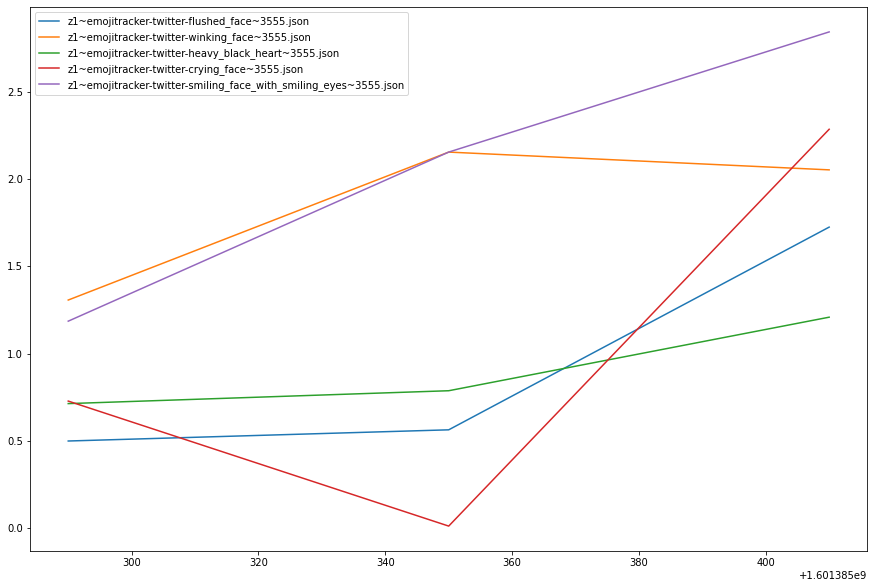

In [ ]:
sorted_z1 = sorted( [ float(mr.get_current_value(name=name)) for name in emoji_streams ], reverse=True )
print(sorted_z1[:5])
TOP_FIVE_THRESHOLD = sorted_z1[5]+1e-6
df_top = None
for name in emoji_streams:
    cv = float(mr.get_current_value(name))
    if cv>TOP_FIVE_THRESHOLD:
      lagged_values = mr.get_lagged_values(name=name)
      lagged_times = mr.get_lagged_times(name=name)
      recent =[ (v,round(t,-1)) for v,t in zip(lagged_values,lagged_times) if t>debate_start_time ]
      recent_values = list(reversed([v for v,t in recent])) # Chronological ordering
      recent_times = list(reversed([t for v,t in recent]))
      df = pd.DataFrame(index=recent_times, data=recent_values,columns=[name])
      if df_top is None:
        df_top = df
      else:
        df_top = df_top.merge(df,left_index=True,right_index=True)
df_top.plot()

let's hope heavy black heart isn't still dominant later today